In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer

%matplotlib inline
# Global variables
BNB_BLUE = '#007A87'
BNB_RED = '#FF5A5F'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'

In [71]:
df=pd.read_csv('/Users/Yash/Downloads/listings.csv', low_memory=False)

#### Print all the features

In [72]:
list(df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [73]:
print(df.shape)

(31253, 95)


In [74]:
df['price'].value_counts()

$100.00      1028
$75.00        899
$150.00       882
$99.00        824
$50.00        814
$125.00       715
$65.00        667
$60.00        654
$80.00        648
$95.00        632
$85.00        609
$70.00        604
$120.00       598
$90.00        583
$55.00        502
$200.00       475
$45.00        452
$250.00       448
$110.00       419
$89.00        413
$79.00        404
$175.00       398
$40.00        389
$199.00       384
$69.00        381
$115.00       342
$35.00        333
$59.00        327
$130.00       326
$135.00       315
             ... 
$472.00         1
$286.00         1
$954.00         1
$378.00         1
$417.00         1
$892.00         1
$4,250.00       1
$1,094.00       1
$3,495.00       1
$832.00         1
$502.00         1
$363.00         1
$1,057.00       1
$446.00         1
$393.00         1
$2,242.00       1
$2,125.00       1
$501.00         1
$2,074.00       1
$283.00         1
$467.00         1
$478.00         1
$6,600.00       1
$455.00         1
$4,288.00 

In [75]:
print ('Number of entries: ', df.shape[0])

Number of entries:  31253


### Visualizing prices

In [76]:
def plot_hist(n, titles, ranges):
    fig, ax = plt.subplots(n, figsize = (8, 7.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, normed = 1, color= BNB_RED, alpha = 0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Daily Listing Price in Dollars")
        ax[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [77]:
#Visualize price table, changing them to floats and replacing the commas with a blank
prices = df['price'].apply(lambda s: float(s[1:].replace(',','')))

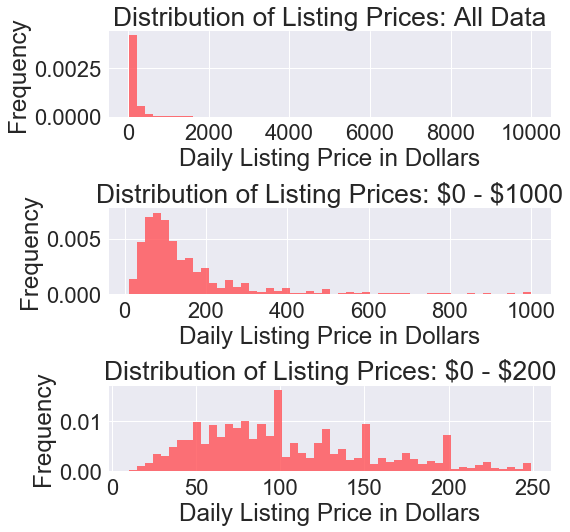

In [78]:
plot_hist(3, ['Distribution of Listing Prices: All Data', 'Distribution of Listing Prices: \$0 - \$1000', 
               'Distribution of Listing Prices: \$0 - \$200'], [prices, prices[prices <= 1000], prices[prices < 250]])

In [79]:
# Get frequency of bedroom number for listings
bedrooms_counts = Counter(df.bedrooms)
tdf = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
tdf = (tdf.iloc[-10:, :] / 27392) * 100

In [80]:
# Sort bedroom dataframe by number
tdf.sort_index(axis = 0, ascending = True, inplace = True)

#### Plot the percentage of listings by bedroom number

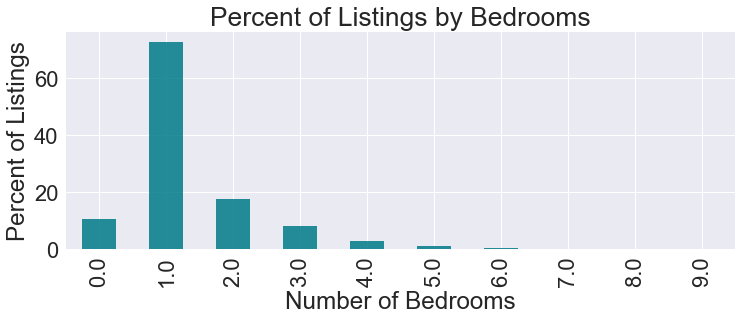

Percent of 1 Bedroom Listings: %72.78


In [81]:
# Plot percent of listings by bedroom number
ax = tdf.plot(kind = 'bar', figsize = (12, 4), color = BNB_BLUE, alpha = 0.85)
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Percent of Listings")
ax.set_title('Percent of Listings by Bedrooms')
ax.legend_.remove()

plt.show()

print ("Percent of 1 Bedroom Listings: %{0:.2f}".format(tdf[0][1]))

#### Plot listings on scatterplot by using Latitude and Longitude

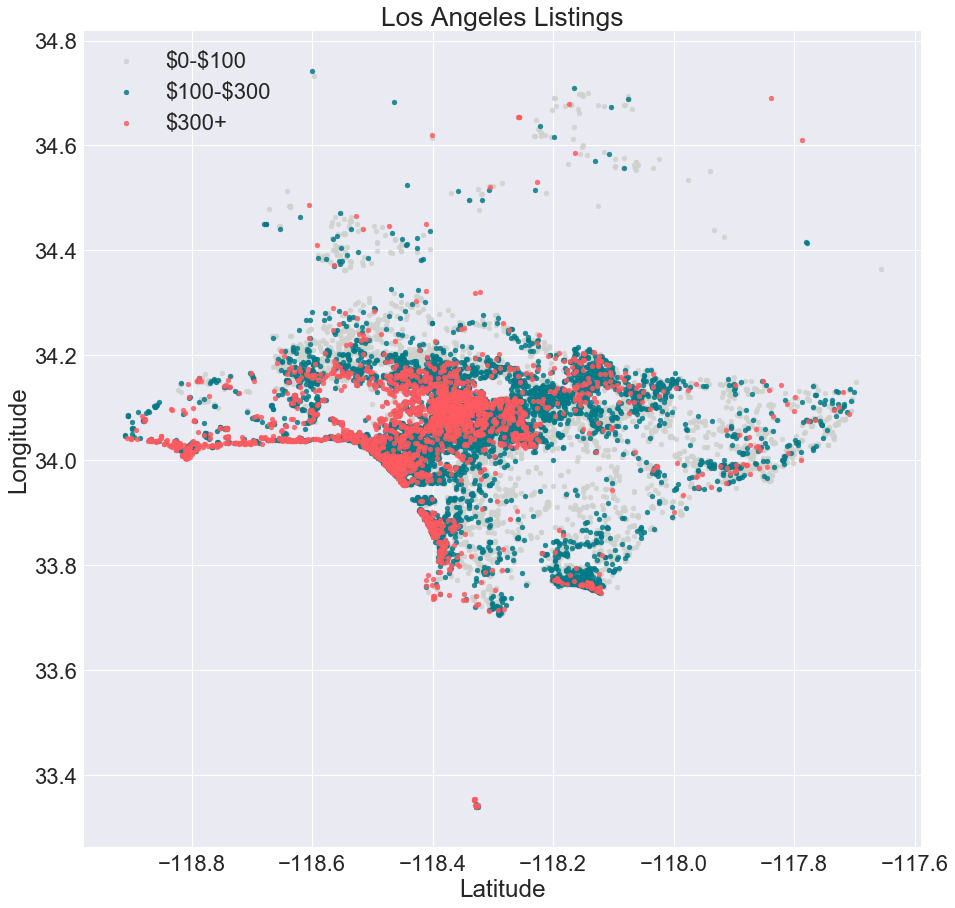

In [82]:
# Outline price buckets
intervals = [0,100,300, 10000]
leg_labels = []

# Get Labels for legend
for i in range(0,len(intervals) - 1):
    if i == len(intervals) - 2:
        leg_labels.append('\${}+'.format(intervals[i]))
    else:
        leg_labels.append("\${}-\${}".format(intervals[i], intervals[i+1]))    

buckets = []

# Divide up into price buckets
for i in range(0, len(intervals) - 1):
    buckets.append(df[(prices > intervals[i]) & (prices < intervals[i+1])])

colors = [BNB_LIGHT_GRAY, BNB_BLUE, BNB_RED]
alphas = [0.85, 0.85, 0.85]  

# Plot listings on scatterplot
plt.figure(figsize=(15, 15))
for i in range(0, len(buckets)):
     plt.scatter(buckets[i]['longitude'], buckets[i]['latitude'], alpha = alphas[i], c=colors[i], s=25)
    
plt.title('Los Angeles Listings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(labels=leg_labels, loc = 'best')
#plt.xlim(-74.2,-73.7)
#plt.ylim(40.45,40.95)

plt.show()

#### Plot emptiness graph

In [83]:
def percent_empty(df):
    
    bools = df.isnull().tolist()
    percent_empty = float(bools.count(True)) / float(len(bools))
    
    return percent_empty, float(bools.count(True))

In [84]:
# Store emptiness for all features
emptiness = []

missing_columns = []

# Get emptiness for all features
for i in range(0, df.shape[1]):
    p, n = percent_empty(df.iloc[:,i])
    if n > 0:
        missing_columns.append(df.columns.values[i])
    emptiness.append(round((p), 2))
    
empty_dict = dict(zip(df.columns.values.tolist(), emptiness))


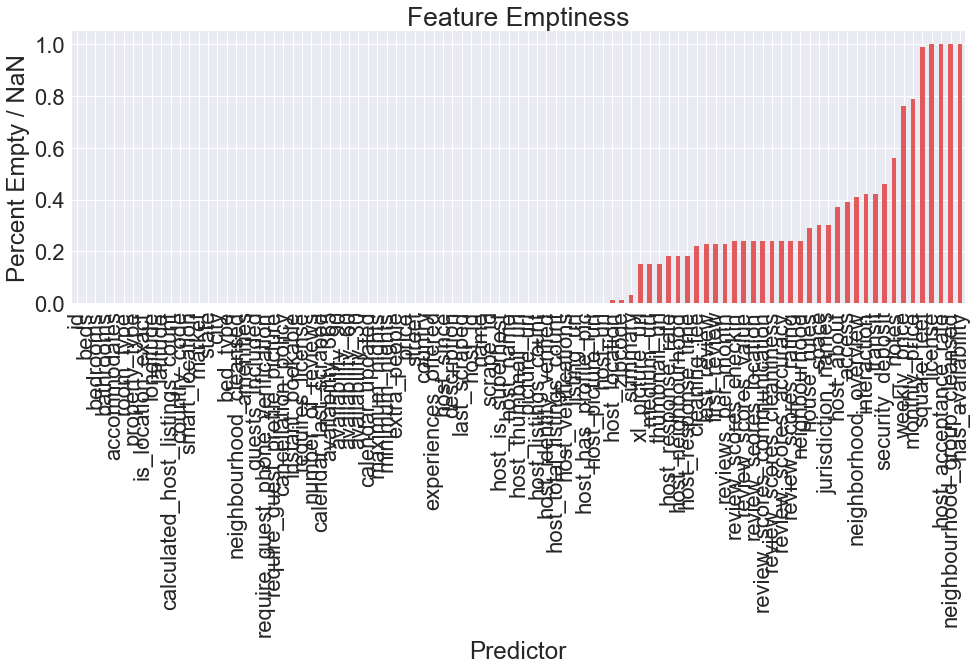

In [85]:
# Plot emptiness graph
empty = pd.DataFrame.from_dict(empty_dict, orient = 'index').sort_values(by=0)
ax = empty.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Predictor')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
ax.legend_.remove()

plt.show()

### Defining a function to convert "categorical" feature to "numerical" feature


In [86]:
df['amenities'].head()

0    {"Wireless Internet","Air conditioning",Pool,K...
1                                                   {}
2    {"Wireless Internet","Air conditioning","Wheel...
3    {TV,"Wireless Internet","Air conditioning",Poo...
4    {Internet,"Wireless Internet",Kitchen,"Free pa...
Name: amenities, dtype: object

In [87]:
y=0
for x in df['amenities']:
    if 'TV' in x:
        df.loc[y,'tv']='1'
        y+=1
    else:
        df.loc[y,'tv']='0'
        y+=1


In [88]:

y=0
for x in df['amenities']:
    if 'Wireless Internet' in x:
        df.loc[y,'Wireless_Internet']='1'
        y+=1
    else:
        df.loc[y,'Wireless_Internet']='0'
        y+=1

In [89]:
y=0
for x in df['amenities']:
    if 'Free parking on premises' in x:
        df.loc[y,'Parking']='1'
        y+=1
    else:
        df.loc[y,'Parking']='0'
        y+=1

In [90]:
y=0
for x in df['amenities']:
    if 'Pool' in x:
        df.loc[y,'Pool']='1'
        y+=1
    else:
        df.loc[y,'Pool']='0'
        y+=1

In [91]:
y=0
for x in df['amenities']:
    if 'Kitchen' in x:
        df.loc[y,'Kitchen']='1'
        y+=1
    else:
        df.loc[y,'Kitchen']='0'
        y+=1

In [92]:
pd.to_numeric(df.tv)
pd.to_numeric(df.Wireless_Internet)
pd.to_numeric(df.Parking)
pd.to_numeric(df.Pool)
pd.to_numeric(df.Kitchen).head()

0    1
1    0
2    1
3    1
4    1
Name: Kitchen, dtype: int64

In [93]:
df['Pool'] = df['Pool'].astype(float)
df['Parking'] = df['Parking'].astype(float)
df['Kitchen'] = df['Kitchen'].astype(float)
df['Wireless_Internet'] = df['Wireless_Internet'].astype(float)
df['tv'] = df['tv'].astype(float)

In [94]:
df['extra_people']=df['extra_people'].apply(lambda x: x.replace('$',''))
df['extra_people']=df['extra_people'].apply(lambda x:x.replace(',',''))
df['extra_people'] = df['extra_people'].astype(float)

In [95]:
df['price']=df['price'].apply(lambda x: x.replace('$',''))
df['price']=df['price'].apply(lambda x:x.replace(',',''))
df['price']=df['price'].astype(float)

In [96]:
 #df = df.replace(np.nan, 0)

In [97]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['bathrooms','bedrooms','beds',
                'extra_people','tv',
                'Parking','Pool','Kitchen',
                'latitude','longitude', 'Wireless_Internet']
#'host_response_rate','host_identity_verified','city','property_type', 'room_type', bed_type','cancellation_policy', 
#'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'security_deposit',
# 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','number_of_reviews',  
#                 'availability_30', 'availability_60', 'availability_90', 'availability_365','accommodates',
 

In [98]:
featured_matrix=df[feature_cols]

In [99]:
featured_matrix.bathrooms.fillna(1).head()

0    7.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: bathrooms, dtype: float64

In [100]:
featured_matrix['bedrooms'].fillna(1).head()

0    5.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: bedrooms, dtype: float64

#### Filtering the dataset

In [101]:
label_vector =df[df['price']<=500]
featured_matrix=df[df['price']<=500]

In [102]:
df1 =df[(df.price<=500)]


In [103]:
featured_matrix = df1[feature_cols]


In [104]:
label_vector= df1['price']

In [138]:
featured_matrix.shape

(29982, 11)

In [105]:
featured_matrix[featured_matrix['bathrooms'].isnull()].head()

,bathrooms,bedrooms,beds,extra_people,tv,Parking,Pool,Kitchen,latitude,longitude,Wireless_Internet
7,NaN,1.0,1.0,20.0,1.0,0.0,0.0,1.0,34.028899,-118.299976,1.0
26,NaN,1.0,1.0,10.0,0.0,0.0,0.0,1.0,34.032356,-118.299849,1.0
27,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,34.031454,-118.299893,1.0
30,NaN,1.0,2.0,10.0,0.0,0.0,0.0,1.0,34.028641,-118.301296,1.0
526,NaN,3.0,1.0,0.0,0.0,0.0,0.0,0.0,34.191019,-118.126456,0.0


In [106]:
featured_matrix.bathrooms=featured_matrix.bathrooms.fillna(1)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [107]:
featured_matrix.beds=featured_matrix.beds.fillna(1)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [108]:
featured_matrix.bedrooms=featured_matrix.bedrooms.fillna(1)

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [109]:
X = featured_matrix
y=label_vector

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

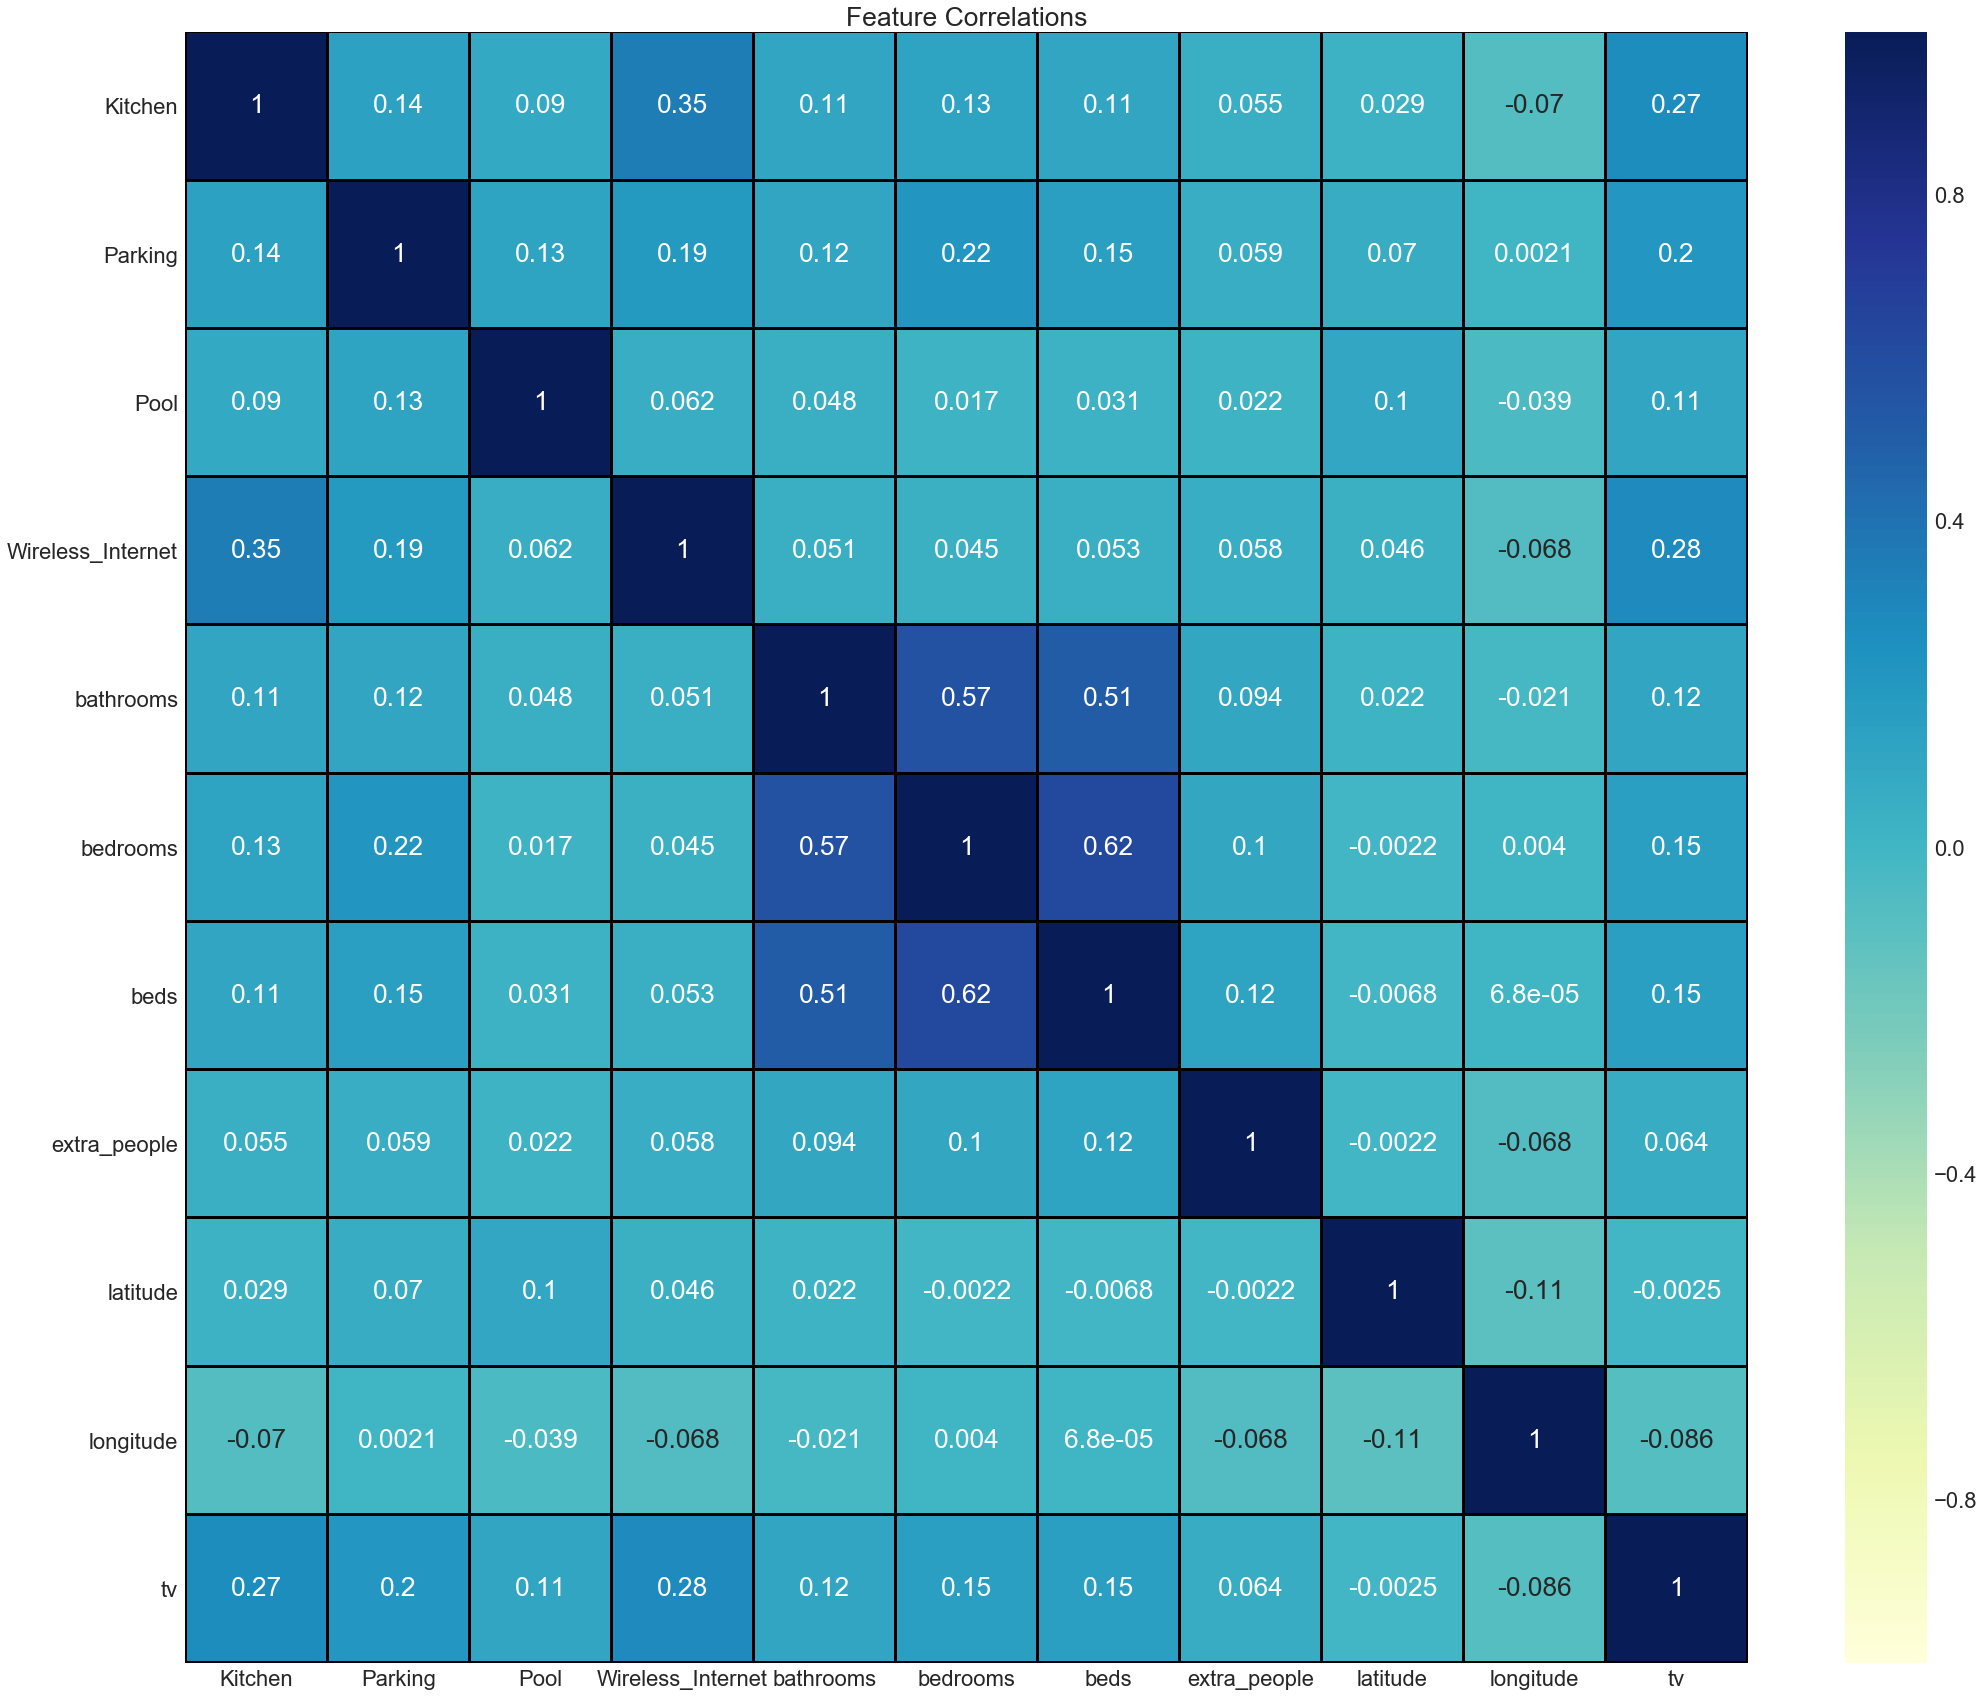

In [111]:
#new = new.convert_objects(convert_numeric=True)
sns.set(font_scale=2.2)
str_list = []
for colname, colvalue in featured_matrix.iteritems():
    if type(colvalue)==str:
        str_list.append(colname)

num_list = featured_matrix.columns.difference(str_list)

house_num = featured_matrix[num_list]

f,ax = plt.subplots(figsize = (35,30))

plt.title('Feature Correlations')


sns.heatmap(house_num.astype(float).corr(),linewidths=2.0,vmax=1.0, square = False,
            cmap = 'YlGnBu',linecolor = 'K', annot = True)

plt.show()

## Step3: Defining (instantiating) an "object" from the sklearn class:
#### Splitting the Dataset:

In [112]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(featured_matrix, label_vector, test_size=0.2, random_state=3)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(23985, 11)
(23985,)
(5997, 11)
(5997,)


# ANN Regression
#### Defining (instantiating) an "object" from the sklearn class "MLPRegressor" (Multi-layer Perceptron (MLP)):

In [113]:
# "my_ANN" is instantiated as an "object" of MLPRegressor "class". 

my_ANN = MLPRegressor(hidden_layer_sizes=(6,4,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
    random_state=2, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


#### Training Stage: Training a predictive model using the training dataset:


In [114]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)


MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [115]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[  4.86514897e-001,  -8.02755311e-001,   4.74720433e-001,
         -1.21574350e+000,  -2.39571323e-040,   5.87155544e-312],
       [  4.00572204e+000,   2.35009974e+000,   3.99952855e+000,
         -6.43851960e+000,  -2.69287313e-023,  -2.17068315e-316],
       [ -3.71661860e-001,   3.87255558e-001,  -2.06137217e-001,
         -5.00317997e-001,  -2.64545272e-016,  -1.89624134e-316],
       [  2.40863116e-001,  -4.18377914e-002,  -1.25699185e-001,
          5.92802436e-002,  -1.99961164e-003,  -9.13288190e-268],
       [  2.05260662e+000,   4.43761384e+000,   2.58660922e+000,
         -3.21928993e+000,   5.72917457e-072,   1.39779492e-315],
       [  1.23823686e+000,   8.51302269e-001,   1.48062882e+000,
         -1.79932257e+000,  -1.45123474e-082,  -2.40887832e-316],
       [  1.19369951e+000,   2.05237758e+000,   7.63729144e-001,
         -5.98854576e-001,   4.16963423e-067,  -3.77424652e-318],
       [  1.33169600e+000,   7.55606631e-001,   1.02349781e+000,
         -1.27804

#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:


In [116]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[  82.98391263  188.55572984   85.72326677 ...,   87.92957184  100.72209545
  123.29110292]


### Accuracy Evaluation:


In [117]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_ann)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_ann) / y_test)) * 100
print('MAPE:',mape)

RSME: 66.2080459153
MAPE: 54.5304386268936


# Random Forest Regressor
#### Defining (instantiating) an "object" from the sklearn class "RandomForestRegressor":

In [118]:
my_RF = RandomForestRegressor(n_estimators = 19, bootstrap = True, random_state=2)

#### Training Stage: Training a predictive model using the training dataset:


In [119]:
# Training ONLY on the training set:
my_RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=19, n_jobs=1, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [120]:
# Testing on the testing set:

y_predict_RF = my_RF.predict(X_test)

print(y_predict_RF)

[  26.47368421  135.15789474  106.78947368 ...,  108.36842105   62.78947368
  104.94736842]


### Accuracy Evaluation:


In [121]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_RF)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_RF) / y_test)) * 100
print('MAPE:',mape)

RSME: 57.9009260853
MAPE: 35.81029115998633


# Linear Regression
#### Defining (instantiating) an "object" from the sklearn class "LinearRegression":

In [122]:
my_linear = LinearRegression()
my_linear.fit(featured_matrix, label_vector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
print(my_linear.intercept_)

print(my_linear.coef_)
coef_list = my_linear.coef_

print(coef_list)

-10398.2500719
[  11.51258171   49.5179181     6.16249765    0.27045647   24.45079357
   12.68726652   10.48787223    5.28772311  -65.44994356 -106.86186098
  -16.4938442 ]
[  11.51258171   49.5179181     6.16249765    0.27045647   24.45079357
   12.68726652   10.48787223    5.28772311  -65.44994356 -106.86186098
  -16.4938442 ]


In [124]:
my_linear.fit(X_train, y_train)
y_predict_ln = my_linear.predict(X_test)
print(y_predict_ln)

[  89.11011121  152.31616324   55.86260811 ...,   91.66206085  137.20970274
  131.56106875]


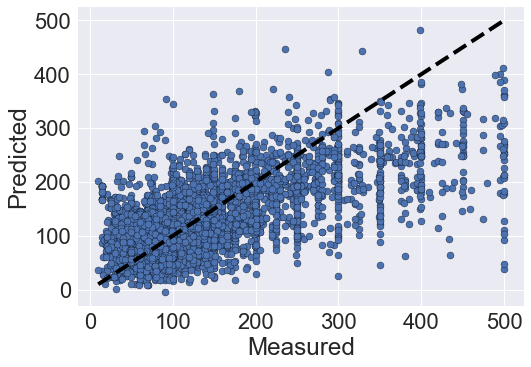

In [125]:

y_predict_ln = my_linear.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Accuracy Evaluation:


In [126]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_ln)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_ln) / y_test)) * 100
print('MAPE:',mape)

RSME: 67.5813279304
MAPE: 57.15834662737007


# Polynomial Regressor
#### Defining (instantiating) an "object" from the sklearn class "PolynomialRegressor":

In [127]:

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly, y_train)
y_predict_poly = poly_lin_reg.predict(X_test_poly)
print(y_predict_poly)

[  94.14731237  154.36326282   74.41212397 ...,   91.62578219  110.50578807
  121.4547773 ]


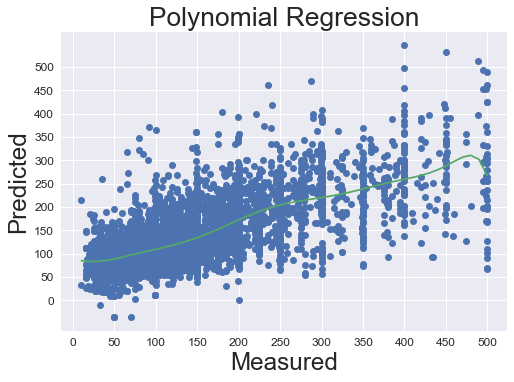

In [128]:
z = np.polyfit(y_test,y_predict_poly,10) 

p = np.poly1d(z)

plt.title ('Polynomial Regression')
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
            ['0','50','100', '150', '200', '250', '300',  '350', '400', '450', '500'], fontsize = 12)
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
            ['0','50','100', '150', '200', '250', '300',  '350', '400', '450', '500'],
            fontsize = 12)

#plt.plot(y_test[:100], y_predict_poly[:100],'o-')
#plt.plot(y_test[:5], y_predict_poly[:5], '-')

datax_os = np.linspace(y_test.min(), y_test.max(), 50)
#plt.figure(figsize=(18,18))
plt.plot(y_test, y_predict_poly, 'o',datax_os, p(datax_os) ) # 'smoother' line

plt.show()

### Accuracy Evaluation:


In [129]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_poly)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_poly) / y_test)) * 100
print('MAPE:',mape)

RSME: 63.5071352493
MAPE: 48.89292149050256


# Logistic Regression
#### Defining (instantiating) an "object" from the sklearn class "LogisticRegression":

In [130]:
my_logreg = LogisticRegression()


In [131]:
my_logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
y_predict_log = my_logreg.predict(X_test)

print(y_predict_log)

[ 100.  150.  100. ...,   75.   75.  100.]


### Accuracy Evaluation:


In [133]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_log)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print('RSME:',rmse)

mape = np.mean(np.abs((y_test - y_predict_log) / y_test)) * 100
print('MAPE:',mape)

RSME: 71.822428465
MAPE: 44.14449550633551


#  
#  Finding the best  features
#  

In [134]:
from sklearn.metrics import matthews_corrcoef


In [135]:
feature_cols = ['bathrooms','bedrooms','beds',
                'extra_people','tv',
                'Parking','Pool','Kitchen',
                'latitude','longitude', 'Wireless_Internet']
#'host_response_rate','host_identity_verified','city','property_type', 'room_type', bed_type','cancellation_policy', 
#'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'security_deposit',
# 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value','number_of_reviews',  
#                 'availability_30', 'availability_60', 'availability_90', 'availability_365','accommodates',
 

In [136]:
a = []
for f in feature_cols:
    a.append(np.abs(np.corrcoef(X[f],y)[1,0]))
        
a.sort()
print(a)

[0.046176861022762264, 0.056271799851138414, 0.084201587483069967, 0.14315183701688358, 0.14993057369520929, 0.18658123106301275, 0.2131584794443506, 0.2414079757569679, 0.41706203479787723, 0.45424620778599506, 0.59732553997040283]


In [137]:
count = 1
for f in feature_cols:
    if np.abs(np.corrcoef(X[f],y)[1,0]):
        #print(f)
        print(count , '-' , f  , '=' ,  np.abs(np.corrcoef(X[f],y)[1,0]))
        count = count + 1

1 - bathrooms = 0.417062034798
2 - bedrooms = 0.59732553997
3 - beds = 0.454246207786
4 - extra_people = 0.149930573695
5 - tv = 0.241407975757
6 - Parking = 0.213158479444
7 - Pool = 0.0842015874831
8 - Kitchen = 0.143151837017
9 - latitude = 0.0461768610228
10 - longitude = 0.186581231063
11 - Wireless_Internet = 0.0562717998511
